# **Example for Least Squares**$\def\rr{\mathbb{R}}\def\bx{\mathbf{x}}\def\by{\mathbf{y}}$

## 1. Review of the linear method (see [here](https://en.wikipedia.org/wiki/Least_squares#Linear_least_squares))

### 1.1 Data and template set up

Let $\bx = [x_1,\ldots, x_n] \subset \rr^p$ and $\by = [y_1,\ldots,y_n] \subset \rr^q$ be the data points. More precisely, we know that for the input $x_i$ we obtain a value $y_i$ ($x_i \mapsto y_i$) and let $F: \rr^p \rightarrow \rr^q$ be the function such that $F(x_i) = y_i$ for all $i=1,\ldots,n$.

Usually, finding the function $F$ from the data is an impossible task. That is why we usually set up a template for the $F$ and build an auxiliary function:
$$f(x,\beta) = \sum_{j=1}^m \beta_j\phi_j(x),$$
where $f: \rr^p \times \rr^m \rightarrow \rr^q$ is a function parametrized by the $\beta_1,\ldots, \beta_m$ and the template functions $\phi_1,\ldots,\phi_m$. Then we try to find the best possible values of the parameters $\beta$ such that the function $f(\cdot,\beta)$ approximates as good as possible the function $F(\cdot)$.

This can be done in this linear case quite easily by understanding how the template functions $\phi_i$ acts over the data points $x_i$:
$$X = \begin{pmatrix}\phi_1(x_1) & \phi_2(x_1) & \ldots & \phi_m(x_1)\\\phi1(x_2) & \phi_2(x_2) & \ldots & \phi_m(x_2)\\\vdots&\vdots&\ddots&\vdots\\\phi_1(x_n) & \phi_2(x_n) & \ldots & \phi_m(x_n)\end{pmatrix} \in \rr^{n\times m},$$
hence we can write:
$$f(\mathbf{x}) = \begin{pmatrix}f(x_1)\\f(x_2)\\\vdots\\f(x_n)\end{pmatrix} = X\beta^T.$$
Finally, let's $Y = (y_1,\ldots,y_n)^T$

### 1.2 The loss function and gradient descent

Then we can write the loss function for a given set of parameters $\beta$ as follows: 
$$L((\bx,\by),\beta) = ||f(\bx) - \by||^2_2 = ||X\beta - Y||_2^2,$$
and, in particular, we can compute the gradient w.r.t. $\beta$:
$$\frac{\partial L}{\partial\beta} = -2X^TY + 2X^TX\beta.$$

The minimum of the loss will be found when the gradient is zero, hence $X^TY = X^TX\beta$. Then, when $X^TX$ is invertible, we get:
$$\beta^o = (X^TX)^{-1}X^TY.$$

But we could also create a numerical algorithm that would do a gradient descent in the $\beta$ parameters and converge into the optimal value $\beta^o$. Assume we start with a set of initial parameters $\beta_0 \in \rr^m$ and define the recurrence
$$\beta_{k+1} = \beta_k - \eta \frac{\partial L}{\partial\beta}((\bx,\by), \beta_k),$$
for some learning-rate parameter $\eta$. This is a dynamical system in discrete time.

## 2. Applying CLUE to LS

We have the following dynamical system in discrete time:
$$\beta_{k+1} = \beta_k - \eta \frac{\partial L}{\partial\beta}((\bx,\by), \beta_k),$$
and we want to compute a reduction in the terms of CLUE. This would mean to find a linear lumping $L \in \rr^{k\times m}$ such that if we define the *reduced set of parameters* $\hat\beta = L\beta$, then we can find a function in $\hat\beta$ such that:
$$\hat\beta_{k+1} = g(\hat\beta_k).$$

As a matter of fact, we know that if $L$ is a lumping of the system, we have that the function $g$ can be computed by:
$$\hat\beta_{k+1} = g(\hat\beta_k) = L \left(L^+\hat\beta - \eta \frac{\partial L}{\partial\beta}((\bx,\by), L^+\hat\beta_k)\right) = \hat\beta_{k} - \eta L\left(\frac{\partial L}{\partial\beta}((\bx,\by), L^+\hat\beta_k)\right).$$

**Remark 1**: let $\beta^o$ be a fixed point for the original dynamical system. Then $\hat\beta^o = L\beta^o$ is a fixed point for the reduced dynamical system.

**Remark 2**: let $\hat\beta^o$ be a fixed point for the reduced dynamical system. Then there is $\beta^o$ with $L\beta^o = \hat\beta^o$ such that $\beta^o$ is a fixed point for the original dynamical system.

## 3. Example with a symmetry in the data

Assume that our function is $y = F(x) = \sinh(x)$. In this case, $p=q=1$. These would be possible data points:

In [1]:
from numpy import array, sinh, cosh, matmul
from numpy.linalg import inv
from numpy.random import random
from matplotlib import pyplot

In [2]:
x = 2*random(4); x = array(list(x) + list(-x))
y = cosh(x)

In [3]:
array([el for el in zip(x,y)])

array([[ 1.95146416,  3.59052606],
       [ 1.69779607,  2.82249152],
       [ 1.73493803,  2.92249383],
       [ 0.43890557,  1.09787524],
       [-1.95146416,  3.59052606],
       [-1.69779607,  2.82249152],
       [-1.73493803,  2.92249383],
       [-0.43890557,  1.09787524]])

If we plot this data, we see something convex:

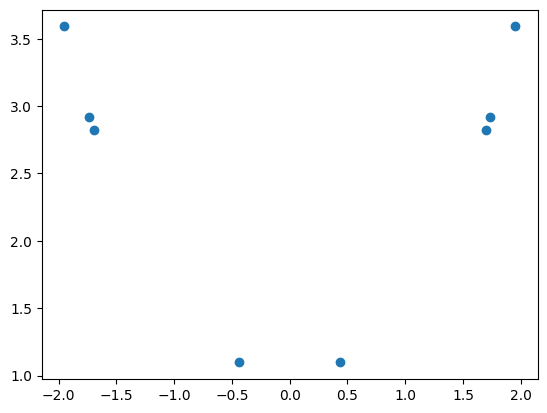

In [4]:
pyplot.plot(x, y, 'o');

So we try to approximate it by a degree 2 polynomial. Namely, we set as template functions: $\phi_1(x) = 1$, $\phi_2(x) = x$ and $\phi_3(x) = x^2$. We then proceed to compute the matrix $X$:

In [5]:
phi1 = lambda p: 1; phi2 = lambda p: p; phi3 = lambda p : p**2
X = array([[phi(p) for phi in [phi1,phi2,phi3]] for p in x]); X

array([[ 1.        ,  1.95146416,  3.80821235],
       [ 1.        ,  1.69779607,  2.88251148],
       [ 1.        ,  1.73493803,  3.01000998],
       [ 1.        ,  0.43890557,  0.1926381 ],
       [ 1.        , -1.95146416,  3.80821235],
       [ 1.        , -1.69779607,  2.88251148],
       [ 1.        , -1.73493803,  3.01000998],
       [ 1.        , -0.43890557,  0.1926381 ]])

### 3.1 The direct approach with the formula

Using the direct formula to compute the optimal beta, we have the following set of parameters:

In [33]:
beta_optimal = matmul(matmul(inv(matmul(X.transpose(), X)), X.transpose()), y)
optimal_f = lambda p : sum(b*phi(p) for (b,phi) in zip(beta_optimal, (phi1,phi2,phi3)))
beta_optimal

array([ 9.41844968e-01, -4.16333634e-17,  6.73785120e-01])

And we can plot the result, checking that we have found something pretty close to our data

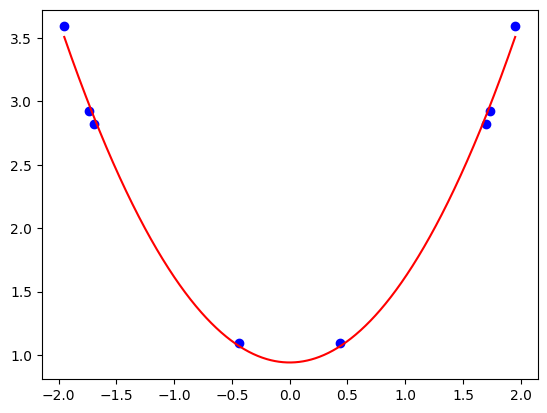

In [7]:
xmin, xmax = min(x), max(x)
points = [xmin + t*(xmax - xmin)/1000 for t in range(1001)]
pyplot.plot(x, y, 'bo');
pyplot.plot(points, [optimal_f(p) for p in points], "r-");

### 3.2 Trying to apply CLUE to the dynamical system

Now, let us consider the dynamical system for the $\beta$. In this case, we have that:
$$\beta_{k+1} = \beta_k - \eta\left(-2X^TY + 2X^TX\beta_k\right).$$
Let us build a dynamical system in clue where we do set up the following differential system:
$$\dot\beta = -X^TY + X^TX\beta.$$

In [9]:
import sys
sys.path.insert(0,"..") # clue is here
from clue import *
from sympy import RR
constants = -matmul(X.transpose(), y)
linear = matmul(X.transpose(), X)
variables = [f"beta_{i}" for i in range(1,4)]
equations = [SparsePolynomial.from_string(f"{c} +" + "+".join([f"({l}*{v})" for l,v in zip(linear[i], variables)]), variables, RR) for (i,c) in enumerate(constants)]
equations

[-20.8667733165147 + 8.0*beta_1 - 2.22044604925031e-16*beta_2 + 19.7867438303426*beta_3,
 -8.88178419700125e-16 - 2.22044604925031e-16*beta_1 + 19.7867438303426*beta_2 + 2.47661943602713e-16*beta_3,
 -61.6351562556565 + 19.7867438303426*beta_1 + 2.47661943602713e-16*beta_2 + 63.8172465522027*beta_3]

In [26]:
system = FODESystem(equations, variables=variables, lumping_subspace=NumericalSubspace, lumping_subspace_kwds={"delta": 0.01})

In [27]:
system.lumping(["beta_1"])

New variables:
y0 = beta_1
y1 = -1.12218870789912e-17*beta_2 + beta_3
New initial conditions:
Lumped system:
y0' = 8.0*y0 - 20.8667733165147 + 19.7867438303426*y1
y1' = 19.7867438303426*y0 - 61.6351562556565 + 63.8172465522027*y1


Lumped system [3 -> 2] (None) [LDESystem -- 2 -- SparsePolynomial]

In [28]:
system.lumping(["beta_2"])

New variables:
y0 = beta_2
New initial conditions:
Lumped system:
y0' = -8.88178419700125e-16 + 19.7867438303426*y0


Lumped system [3 -> 1] (None) [LDESystem -- 1 -- SparsePolynomial]

In [29]:
system.lumping(["beta_3"])

New variables:
y0 = beta_3
y1 = beta_1 + 1.25165588500179e-17*beta_2
New initial conditions:
Lumped system:
y0' = 19.7867438303426*y1 - 61.6351562556565 + 63.8172465522027*y0
y1' = 8.0*y1 - 20.8667733165147 + 19.7867438303426*y0


Lumped system [3 -> 2] (None) [LDESystem -- 2 -- SparsePolynomial]

In [31]:
system.lumping(["beta_1 + beta_3"])

New variables:
y0 = 0.707106781186547*beta_1 + 0.707106781186547*beta_3
y1 = -0.707106781186547*beta_1 + 6.49053653264669e-19*beta_2 + 0.707106781186547*beta_3
New initial conditions:
Lumped system:
y0' = 55.695367106444*y0 + 27.9086232761013*y1 - 58.3376738614572
y1' = 27.9086232761013*y0 + 16.1218794457587*y1 - 28.8276000342772


Lumped system [3 -> 2] (None) [LDESystem -- 2 -- SparsePolynomial]